<a href="https://colab.research.google.com/github/andssuu/PBEA7347/blob/main/notebooks/b3_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/andssuu/PBEA7347.git



Cloning into 'PBEA7347'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 91 (delta 27), reused 49 (delta 9), pack-reused 0
Unpacking objects: 100% (91/91), done.


Importando as bibliotecas necessárias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Leitura e formatação dos dados

In [4]:
df = pd.read_csv('PBEA7347/data/b3_data_14012021.csv', float_precision='high', sep=";")
labels = df.iloc[:, 0]
divida = df.iloc[:, 12:]
retorno = df.iloc[:,11:12]
eficiencia = df.iloc[:, 7:9]
eficiencia["media eficiencia"] = eficiencia.sum(axis=1) / 2
eficienciaMedia = eficiencia.iloc[:, -1]
data = retorno
data = data.join(divida)
data = data.join(eficienciaMedia)
normalized_data = (data - data.min()) / (data.max() - data.min())

Executando o K-Means com o valor de k=3

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_data)
data_clustered = kmeans.predict(normalized_data)

Plotando os clusters no espaço de características com 3 dimensões

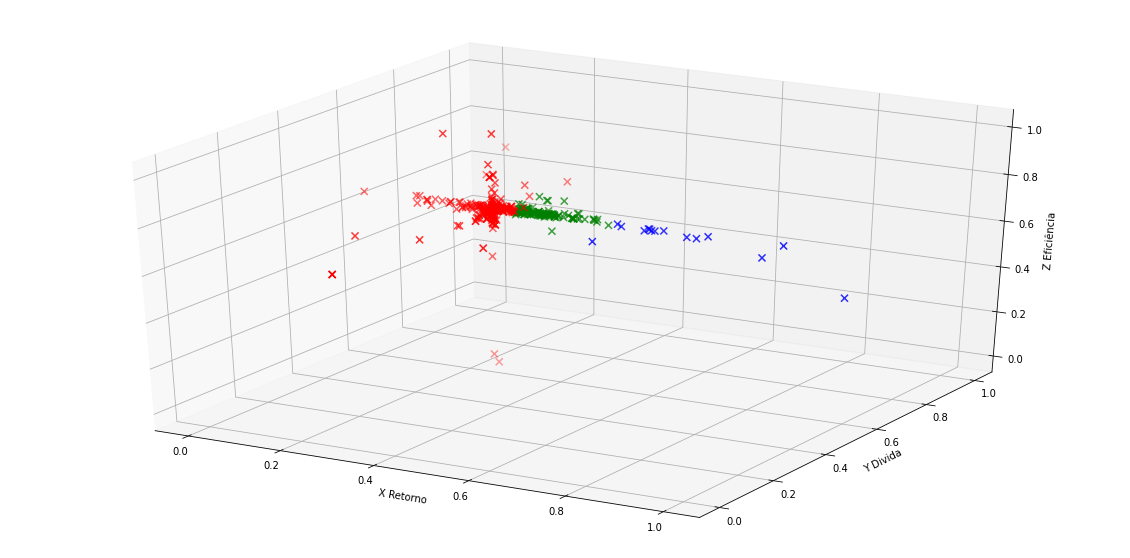

In [6]:
fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111, projection='3d')
label_color_map = {0 : 'red', 1 : 'blue', 2: 'green'} #, 3: 'yellow', 4: "gray", 5: 'beige', 6: 'violet', 7: 'brown', 8:'Orange', 9: 'pink'}
label_color = [label_color_map[l] for l in data_clustered]
graph.scatter(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], c=label_color, marker='x', s=50)
graph.set_xlabel('X Retorno')
graph.set_ylabel('Y Divida')
graph.set_zlabel('Z Eficiência')
#ax = fig.gca(projection='3d')
# for x, y, z, label in zip(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], normalized_data.iloc[:, 2], labels):
    # if x >= 0.7:
    #     ax.text(x, y, z, label, None) 
plt.show()

Exemplo com duas características

In [7]:
normalized_data_2d = normalized_data.iloc[:,:2]

Executando o K-Means com o valor de k=3

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_data_2d)
data_clustered = kmeans.predict(normalized_data_2d)

Plotando os clusters no espaço de características com duas dimensões

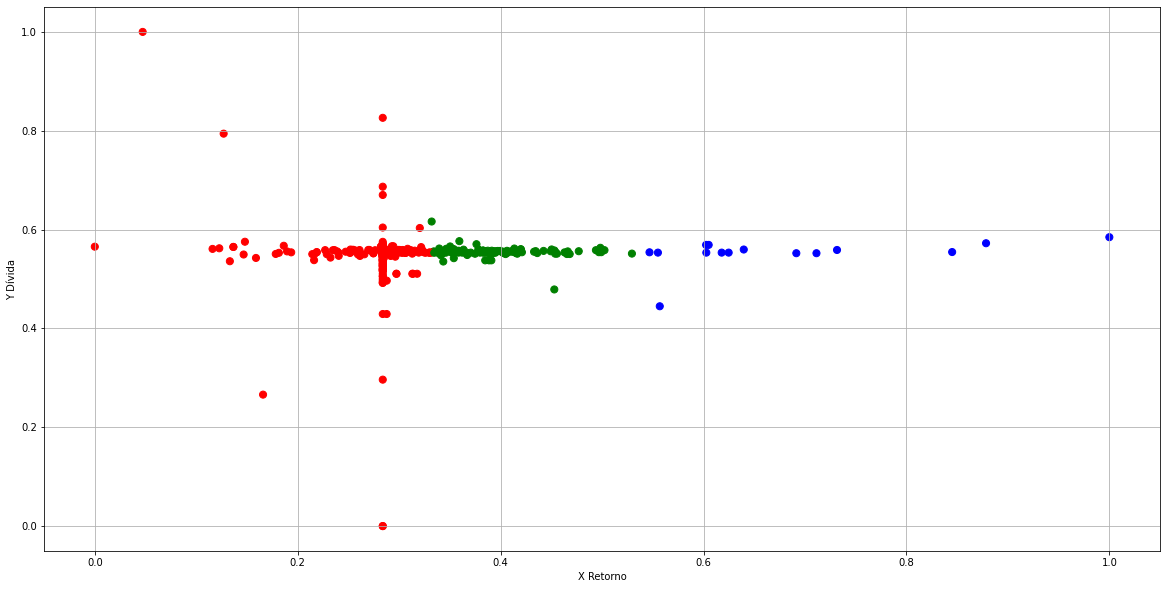

In [9]:
fig = plt.figure(figsize=(20, 10))
graph = fig.add_subplot(111)
graph.scatter(normalized_data_2d.iloc[:, 0], normalized_data_2d.iloc[:, 1], c=label_color, marker='o', s=50)
graph.set_xlabel('X Retorno')
graph.set_ylabel('Y Dívida')
# for x, y, label in zip(normalized_data.iloc[:, 0], normalized_data.iloc[:, 1], labels):
#     if x >= 0.3 and y <=0.55:
#         graph.text(x, y, label, )  
plt.grid()
plt.show()

Calculando o valor da inertia dos clusters

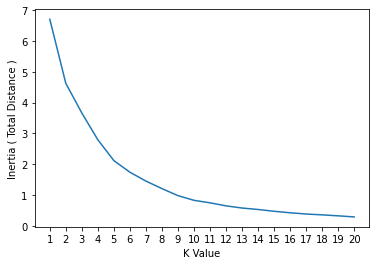

In [11]:
def cluster_variance(n):
    variances=[]
    kmeans=[]
    outputs=[]
    K=[i for i in range(1, n+1)]
    for i in range(1, n+1):
        variance=0
        model=KMeans(n_clusters=i, random_state=0, verbose=0).fit(normalized_data)
        kmeans.append(model)
        variances.append(model.inertia_)
    return variances,K,n
variances, K, n = cluster_variance(20)
plt.plot(K,variances)
plt.ylabel("Inertia ( Total Distance )")
plt.xlabel("K Value")
plt.xticks([i for i in range(1,n+1)])
plt.show()